## 数据预处理

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
dpn = pd.read_excel('../input/DPN/10.25-DPN患者信息表.xlsx',sheet_name='总表')
dpn.loc[0,'分组（1=DPN组，0=非DPN组）'] = '分组'
dpn.columns = dpn.loc[0]
dpn.drop(index=0,axis=0,inplace=True)
dpn.reset_index(drop=True,inplace=True)
dpn.columns

In [3]:
pink = ['性别','年龄','身高','体重','糖尿病性肾病','糖尿病性视网膜病变','高脂血症','高血压','动脉粥样硬化','血常规_白细胞计数','血红蛋白','单核细胞绝对值','嗜酸性粒细胞绝对值','嗜碱性粒细胞绝对值','血小板平均体积','天冬氨酸氨基转移酶','丙氨酸氨基转移酶','白蛋白','总胆红素','尿素','肌酐','血清碳酸氢盐','尿酸','脂肪酶','总胆固醇','甘油三酯','高密度脂蛋白胆固醇','载脂蛋白A1','载脂蛋白B','载脂蛋白E','低密度脂蛋白胆固醇','脂蛋白a','糖化血清蛋白','糖化血红蛋白','促甲状腺激素','凝血酶原时间（PT）','活化部分凝血活酶时间（APTT）','白细胞','尿蛋白','葡萄糖','尿蛋白定量','24h尿蛋白定量','24小时尿量','餐后30分钟C肽','餐后30分钟胰岛素','餐后60分钟C肽','餐后60分钟胰岛素','餐后120分钟胰岛素','病程','C2/C0']
red = ['血小板','中性粒细胞绝对值','淋巴细胞绝对值','糖','空腹胰岛素']
end = ['NLR','PLR','胰岛素抵抗指数']
y = ['分组']
print(f'粉色的有:{len(pink)}列')
print(f'红色的有:{len(red)}列')
print(f'追加的有:{len(end)}列')

粉色的有:50列
红色的有:5列
追加的有:3列


In [4]:
zh2en = {
    '分组':'Category',
    '性别':'gender',
    '年龄':'age',
    '身高':'height',
    '体重':'weight',
    '糖尿病性肾病':'diabetic nephropathy',
    '糖尿病性视网膜病变':'diabetic retinopathy',
    '高脂血症':'hyperlipemia',
    '高血压':'hypertension',
    '动脉粥样硬化':'atherosclerosis',
    '血常规_白细胞计数':'white blood cell count',
    '血红蛋白':'hemoglobin',
    '单核细胞绝对值':'Monocyte absolute values',
    '嗜酸性粒细胞绝对值':'Eosinophils absolute value',
    '嗜碱性粒细胞绝对值':'Basophils absolute value',
    '血小板平均体积':'mean platelets volume',
    '天冬氨酸氨基转移酶':'aspartate transaminase',
    '丙氨酸氨基转移酶':'alanine aminotransferase',
    '白蛋白':'albumin',
    '总胆红素':'total bilirubin',
    '尿素':'urea',
    '肌酐':'creatinine',
    '血清碳酸氢盐':'Serum bicarbonate',
    '尿酸':'Uric Acid',
    '脂肪酶':'lipase',
    '总胆固醇':'total cholesterol',
    '甘油三酯':'triglyceride',
    '高密度脂蛋白胆固醇':'hdl-cholesterol',
    '载脂蛋白A1':'Apolipoprotein A1',
    '载脂蛋白B':'Apolipoprotein B',
    '载脂蛋白E':'Apolipoprotein E',
    '低密度脂蛋白胆固醇':'LDL Cholesterol',
    '脂蛋白a':'Lipoprotein a',
    '糖化血清蛋白':'glycated serum protein',
    '糖化血红蛋白':'glycosylated hemoglobin',
    '促甲状腺激素':'thyrotropic hormone',
    '凝血酶原时间（PT）':'prothrombin time',
    '活化部分凝血活酶时间（APTT）':'activated partial thromboplastin time',
    '白细胞':'leucocyte',
    '尿蛋白':'urine protein',
    '葡萄糖':'glucose',
    '尿蛋白定量':'urine protein quantity',
    '24h尿蛋白定量':'24h urine protein quantity',
    '24小时尿量':'24-hour urine output',
    '餐后30分钟C肽':'C-peptide 30 minutes after meal',
    '餐后30分钟胰岛素':'Insulin 30 minutes after a meal',
    '餐后60分钟C肽':'C-peptide 60 minutes after a meal',
    '餐后60分钟胰岛素':'Insulin 60 minutes after a meal',
    '餐后120分钟胰岛素':'Insulin 120 minutes after a meal',
    '病程':'Diabetes duration',
    'C2/C0':'C2/C0',
    'NLR':'NLR',
    'PLR':'PLR',
    '胰岛素抵抗指数':'HOMA-IR'
}

In [5]:
dpn = dpn[y+pink+end]
dpn.replace('-----',np.nan,inplace=True)
dpn.replace('/',np.nan,inplace=True)
dpn.rename(columns=zh2en,inplace=True)
dpn.columns
dpn['height']=dpn['height'].copy().replace('未测',np.nan)
dpn['weight']=dpn['weight'].copy().replace('未测',np.nan)


In [6]:
# dpn['U/C']=dpn['urine protein quantity'].astype(float)/dpn['creatinine'].astype(float)
# dpn['U/C'].value_counts()
# dpn

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
# plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

# msno.bar(dpn,labels=True,sort='descending')

In [7]:
dpn.drop(columns=[zh2en['餐后30分钟C肽'],zh2en['餐后30分钟胰岛素']],inplace=True)
dpn.drop(columns=[zh2en['餐后60分钟C肽'],zh2en['餐后60分钟胰岛素'],zh2en['糖化血清蛋白'],zh2en['脂蛋白a'],zh2en['载脂蛋白E'],zh2en['载脂蛋白B'],zh2en['载脂蛋白A1'],zh2en['餐后120分钟胰岛素']],inplace=True)
dpn.replace(to_replace=r'<',value=0,regex=True,inplace=True) # < 0.01 ===> 0
dpn.replace(to_replace=r'>',value=1000,regex=True,inplace=True) # > 1000.00 ===> 1000
from collections import Counter
Counter(dpn['Category'])

Counter({1.0: 748, 0.0: 530})

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dpn['gender']=le.fit_transform(dpn['gender'])
print('性别 类别：',le.classes_)



dpn['leucocyte'] = dpn['leucocyte'].copy().replace(['+','++','+++','0-1','2-3','弱阳性'],'阳性(+)')
dpn['leucocyte'] = dpn['leucocyte'].replace(['未见'],'阴性(-)')
dpn['leucocyte']=le.fit_transform(dpn['leucocyte'])
print('白细胞 类别',le.classes_)

dpn['urine protein'] = dpn['urine protein'].copy().replace(['+','++','+++','++++','弱阳性'],'阳性(+)')
# dpn['urine protein'] = dpn['urine protein'].copy().replace(['-'],'阴性(-)')
dpn['urine protein']=le.fit_transform(dpn['urine protein'])
print('尿蛋白 类别',le.classes_)

dpn['glucose'] = dpn['glucose'].copy().replace(['+','++','+++','++++','15.4','18.5','19.7','21.0','6.9','弱阳性'],'阳性(+)')
print(Counter(dpn['glucose']))
dpn['glucose']=le.fit_transform(dpn['glucose'])
print('葡萄糖 类别',le.classes_)


for col in dpn.columns:
    dpn[col]=dpn[col].astype(float)

性别 类别： ['女' '男']
白细胞 类别 ['阳性(+)' '阴性(-)' nan]
尿蛋白 类别 ['-' '阳性(+)' '阴性(-)' nan]
Counter({'阳性(+)': 569, '阴性(-)': 498, nan: 211})
葡萄糖 类别 ['阳性(+)' '阴性(-)' nan]


In [9]:
# dpn['creatinine'][(dpn['creatinine']<10)| (dpn['creatinine']>110)] = 1
# dpn['creatinine'][(dpn['creatinine']>=10) & (dpn['creatinine']<=110)] = 0
# msno.bar(dpn,sort='descending')
# dpn

In [10]:
# dpn.to_excel('../output/dpn/data/dpn_before_filled.xlsx',index=False)

In [11]:
from sklearn.impute import SimpleImputer 
imp_mean = SimpleImputer(strategy='mean')
imp_most_frequent = SimpleImputer(strategy='most_frequent')
dpn_con = dpn.drop(columns=['gender','diabetic nephropathy','diabetic retinopathy','hyperlipemia','hypertension','atherosclerosis','leucocyte','urine protein','glucose','Category'])
dpn_cate = dpn[['Category','gender','diabetic nephropathy','diabetic retinopathy','hyperlipemia','hypertension','atherosclerosis','leucocyte','urine protein','glucose']]
dpn_impute_con = imp_mean.fit_transform(dpn_con)
dpn_impute_cate = imp_most_frequent.fit_transform(dpn_cate)
dpn_cate = pd.DataFrame(dpn_impute_cate,columns=dpn_cate.columns)
dpn_con = pd.DataFrame(dpn_impute_con,columns=dpn_con.columns)
dpn = pd.concat([dpn_cate,dpn_con],axis=1)
dpn.to_csv('../output/dpn/data/dpn_preprocress.csv',index=False)

dpn.to_csv('../output/dpn/data/dpn_preprocress.csv',index=False)
dpn.isna().sum().sum()

0

## 特征筛选和数据平衡

In [12]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from loguru import logger
from sklearn.model_selection import StratifiedKFold
import optuna
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import shap
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
import warnings
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置中易黑体字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
warnings.filterwarnings('ignore')

optuna.logging.set_verbosity(optuna.logging.CRITICAL)
id2feature = {
    0:'非DPN组',
    1:'DPN组'
}
dpn = pd.read_csv('../output/dpn/data/dpn_preprocress.csv')
X = dpn.drop(columns='Category')
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
y = dpn['Category'].astype(int)
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)
# print(Counter(y_train),Counter(y_test))
logger.add('./log/dpn/{time}_end.log')
USE_chi2, USE_f_classif, USE_mutual_info_classif = False, False, False
USE_LSVC,USE_EXTRATREE,USE_LR = False,True,True
k = 15
C = 0.025
penality = 'l2'
random_state = 64
if USE_chi2:
    chi2_model = SelectKBest(chi2, k=k)
    X = pd.DataFrame(chi2_model.fit_transform(
        X, y), columns=X.columns[chi2_model.get_support()])
    logger.info(f'使用 卡方检验 k={k} 进行特征筛选,剩余{X.shape}个特征')
elif USE_f_classif:
    f_classif_model = SelectKBest(f_classif, k=k)
    X = pd.DataFrame(f_classif_model.fit_transform(
        X, y), columns=X.columns[f_classif_model.get_support()])
    logger.info(f'使用 F检验 k={k} 进行特征筛选,剩余{X.shape}个特征')
elif USE_mutual_info_classif:
    mutual_info_classif_model = SelectKBest(mutual_info_classif, k=k)
    X = pd.DataFrame(mutual_info_classif_model.fit_transform(X, y),
                     columns=X.columns[mutual_info_classif_model.get_support()])
    logger.info(f'使用 互信息法 k={k} 进行特征筛选,剩余{X.shape}个特征')
elif USE_LSVC:
    from sklearn.svm import LinearSVC
    from sklearn.feature_selection import SelectFromModel
    lsvc = LinearSVC(C=C, penalty=penality, dual=False,
                     random_state=random_state)
    model = SelectFromModel(lsvc, prefit=True)
    X = pd.DataFrame(model.fit_transform(X,y),columns=X.columns[model.get_support()])
    logger.info(f'使用嵌入法 LinearSVC 进行特征选择,剩余{X.shape}个特征')
elif USE_EXTRATREE:
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.feature_selection import SelectFromModel
    etclf =  RandomForestClassifier(n_estimators=200,max_depth=8,random_state=43).fit(X,y)
    model = SelectFromModel(etclf,prefit=True)
    # fig = plt.figure(figsize=(20,4))
    # print(len(X.columns),len(model.estimator.feature_importances_))
    # plt.bar(x=X.columns,height=model.estimator.feature_importances_)
    # plt.xticks(rotation=-45)
    # plt.show()
    print(model.estimator.feature_importances_[model.get_support()])
    X = pd.DataFrame(model.transform(X),columns=X.columns[model.get_support()])
    logger.info(f'使用嵌入法 RandomForestClassifier 进行特征选择,剩余{X.shape}个特征')
elif USE_LR:
    from sklearn.linear_model import LogisticRegression
    from sklearn.feature_selection import SelectFromModel
    lr = LogisticRegression(penalty='l1',C=C,solver='liblinear')
    model = SelectFromModel(lr)
    X = pd.DataFrame(model.fit_transform(X,y),columns=X.columns[model.get_support()])
    logger.info(f'使用嵌入法 LogisticRegression 进行特征选择,剩余{X.shape}个特征')

cols_selected = X.columns.to_list()
logger.info(f'剩余的特征是：{cols_selected}')
dpn[cols_selected+['Category']].to_csv('../output/dpn/data/dpn_selected.csv',index=False)
# 数据平衡
USE_randomDownSample, USE_Tomek_links, USE_ADASYN, USE_randomOverSample, USE_SMOTE, USE_SMOTETomek = False, False, False, False, False, True

if USE_randomDownSample:
    logger.info('使用 randomDownSample 下采样')
    sampler = RandomUnderSampler(random_state=64)
elif USE_Tomek_links:
    logger.info('使用 TomekLinks 下采样')
    sampler = TomekLinks()
elif USE_ADASYN:
    logger.info('使用 ADASYN 上采样')
    sampler = ADASYN(random_state=64)
elif USE_randomOverSample:
    logger.info('使用 randomOverSample 上采样')
    sampler = RandomOverSampler(random_state=64)
elif USE_SMOTE:
    logger.info('使用 SMOTE 上采样')
    sampler = SMOTE(random_state=64)
elif USE_SMOTETomek:
    logger.info('使用 SMOTETomek 混合采样')
    sampler = SMOTETomek(random_state=43)
else:
    assert False, '没有平衡数据'
logger.info(f'数据平衡前：{id2feature[0]}有{Counter(y)[0]}条,{id2feature[1]}有{Counter(y)[1]}条')
X_resampled, y_resampled = sampler.fit_resample(X, y)
logger.info(f'数据平衡后：{id2feature[0]}有{Counter(y_resampled)[0]}条,{id2feature[1]}有{Counter(y_resampled)[1]}条')
dpn_resampled = pd.concat([y_resampled,X_resampled],axis=1)
dpn_resampled.to_excel('../output/dpn/data/dpn_resampled.xlsx',index=False)


2023-02-22 14:59:39.604 | INFO     | __main__:<module>:80 - 使用嵌入法 RandomForestClassifier 进行特征选择,剩余(1278, 16)个特征
2023-02-22 14:59:39.605 | INFO     | __main__:<module>:90 - 剩余的特征是：['age', 'alanine aminotransferase', 'albumin', 'total bilirubin', 'urea', 'creatinine', 'Uric Acid', 'total cholesterol', 'glycosylated hemoglobin', 'activated partial thromboplastin time', 'urine protein quantity', '24h urine protein quantity', 'Diabetes duration', 'C2/C0', 'NLR', 'HOMA-IR']
2023-02-22 14:59:39.622 | INFO     | __main__:<module>:111 - 使用 SMOTETomek 混合采样
2023-02-22 14:59:39.624 | INFO     | __main__:<module>:115 - 数据平衡前：非DPN组有530条,DPN组有748条


[0.08195795 0.02474175 0.03297601 0.02654909 0.03065755 0.02814892
 0.02584564 0.02335051 0.03850815 0.02952407 0.04463334 0.04561257
 0.06100619 0.03488445 0.03077276 0.02415228]


2023-02-22 14:59:39.783 | INFO     | __main__:<module>:117 - 数据平衡后：非DPN组有702条,DPN组有702条


## 模型对比

### XGBoost

In [13]:
TRAIN_XGB = False
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=43)
    param = {
        'verbosity': 0,
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        'tree_method': 'exact',
        'booster': 'dart',
        'n_estimators':trial.suggest_int('n_estimators',100,500,step=50),
        'max_depth': trial.suggest_int("max_depth", 8,20,step=2),
        'grow_policy': trial.suggest_categorical("grow_policy", ['depthwise', 'lossguide']),
        'learning_rate': trial.suggest_float("learning_rate", 1e-8, 1, log=True),
        'gamma': trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1, log=True),
        'subsample': trial.suggest_float('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'random_state': 43
    }
    clf_xgb = xgb.XGBClassifier(**param).fit(train_x, train_y)
    preds = clf_xgb.predict(valid_x)
    return accuracy_score(valid_y, preds)
study = optuna.create_study(direction="maximize")
if TRAIN_XGB:
    study.optimize(objective, n_trials=100, timeout=600)
    logger.info(f'调参结束，最佳结果为:{study.best_value}')
    logger.info(f'调参结束，最佳参数为:{study.best_params}')

In [14]:
from joblib import dump
fixed_params = {
        'verbosity': 0,
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        'tree_method': 'exact',
        'n_estimators':350,
        'max_depth': 12,
        'grow_policy': 'lossguide',
        'learning_rate': 0.04690250747972388,
        'gamma': 1.2214671674376956e-05,
        'reg_lambda':  2.592776397904034e-05,
        'reg_alpha': 1.6642675952811388e-07,
        'subsample':  0.897341255267949,
        'colsample_bytree': 0.661037320664513,
        'random_state': 43
}
Accuracy = []
Precision = []
Recall = []
F1 = []
if TRAIN_XGB:
    clf_xgb = xgb.XGBClassifier(**study.best_params)
else:
    clf_xgb = xgb.XGBClassifier(**fixed_params)
logger.warning(clf_xgb.get_params())
clf_xgb.fit(X_resampled,y_resampled)
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(X_resampled,y_resampled):
    clf_xgb.fit(X_resampled.loc[train_index], y_resampled[train_index])
    preds = clf_xgb.predict(X_resampled.loc[test_index])
    accuracy = accuracy_score(y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'XGB_'+str(round(np.mean(Accuracy), 3))+'.joblib')

2023-02-22 14:59:53.982 | WARNING  | __main__:<module>:26 - {'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.661037320664513, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': 1.2214671674376956e-05, 'gpu_id': None, 'grow_policy': 'lossguide', 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.04690250747972388, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 12, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 350, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': 43, 'reg_alpha': 1.6642675952811388e-07, 'reg_lambda': 2.592776397904034e-05, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.897

#### SHAP

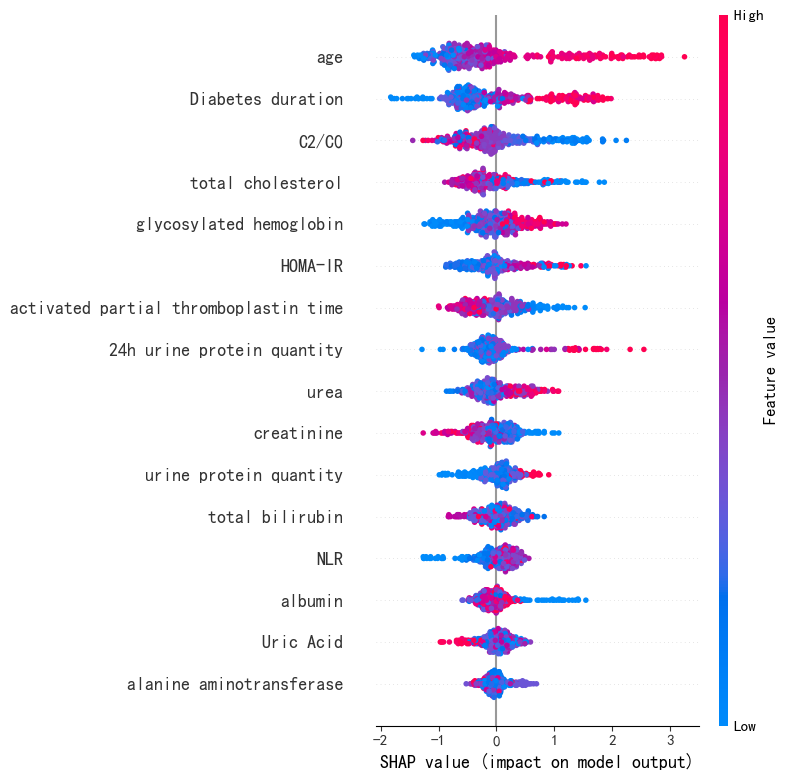

In [15]:
from sklearn.model_selection import train_test_split
data = pd.read_excel('../output/dpn/data/dpn_resampled.xlsx')
X_shap = data.drop(columns='Category')
y_shap = data['Category']
X_shap_train,X_shap_test,y_shap_train,y_shap_test = train_test_split(X_shap,y_shap,test_size=0.3,random_state=43)
clf_xgb.fit(X_shap_train,y_shap_train)
explainer = shap.TreeExplainer(clf_xgb)
shap_values_XGBoost_test = explainer.shap_values(X_shap_test)
shap.summary_plot(shap_values_XGBoost_test, X_shap_test)

#### Confusion matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_xgb_pred = clf_xgb.predict_proba(X_shap_test)[:,1]
xgb_fpr,xgb_tpr,_ = roc_curve(y_shap_test,clf_xgb_pred)
plot_confusion_matrix(clf_xgb,X_shap_test,y_shap_test)
plt.title('XGBoost')

: 

#### ROC 曲线

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
xgb_score = round(roc_auc_score(y_shap_test,clf_xgb_pred),3)
# plot_roc_curve(clf_xgb,X_shap_test,y_shap_test)
xgb_score

: 

### SVM

In [ ]:
TRAIN_SVC = False
from sklearn.svm import SVC
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=43)
    param = {
        # 'random_state':43,
        'C':trial.suggest_float('C',1e-8,1,log=True),
        'gamma':trial.suggest_float('gamma',1e-8,1,log=True),
        # 'probability':True
    }
    model = SVC(**param,random_state=43,probability=True).fit(train_x, train_y)
    preds = model.predict(valid_x)
    return accuracy_score(valid_y, preds)
Accuracy = []
Precision = []
Recall = []
F1 = []
study = optuna.create_study(direction="maximize")
if TRAIN_SVC:
    study.optimize(objective, n_trials=100, timeout=600)
    logger.info(f'调参结束，最佳结果为:{study.best_value}')
    logger.info(f'调参结束，最佳参数为:{study.best_params}')

: 

In [ ]:
fixed_params = {'C': 0.9899203552790449, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.8098439704037791, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 43, 'shrinking': True, 'tol': 0.001, 'verbose': False}
if TRAIN_SVC:
    clf_svc = SVC(**study.best_params,random_state=43,probability=True)
else:
    clf_svc = SVC(**fixed_params)
logger.warning(clf_svc.get_params())
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=32)
for train_index, test_index in kf.split(X_resampled,y_resampled):
    clf_svc.fit(X_resampled.loc[train_index], y_resampled[train_index])
    preds = clf_svc.predict(X_resampled.loc[test_index])
    accuracy = accuracy_score(y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'SVC_'+str(round(np.mean(Accuracy), 3))+'.joblib')

: 

#### SHAP

In [ ]:
# from sklearn.model_selection import train_test_split
# import pandas as pd
# data = pd.read_excel('../output/dpn/data/dpn_resampled.xlsx')
# X_shap = data.drop(columns='Category')
# X_shap.rename(columns=zh2en,inplace=True)
# y_shap = data['Category']
# X_shap_train,X_shap_test,y_shap_train,y_shap_test = train_test_split(X_shap,y_shap,test_size=0.7,random_state=43)
# clf_svc.fit(X_shap_train,y_shap_train)
# explainer = shap.KernelExplainer(clf_svc.predict,shap.sample(X_shap_train, 50,random_state=43))
# shap_values_SVC_test = explainer.shap_values(X_shap_test)
# shap.summary_plot(shap_values_SVC_test, X_shap_test)

: 

#### Confusion maxtrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_svc.fit(X_shap_train,y_shap_train)
clf_svc_pred = clf_svc.predict_proba(X_shap_test)[:,1]
svc_fpr,svc_tpr,_ = roc_curve(y_shap_test,clf_svc_pred)
plot_confusion_matrix(clf_svc,X_shap_test,y_shap_test)
plt.title('SVM')

: 

#### ROC 曲线

In [ ]:
from sklearn.metrics import plot_roc_curve
svc_score = round(roc_auc_score(y_shap_test,clf_svc_pred),3)
# plot_roc_curve(clf_svc,X_shap_test,y_shap_test)
svc_score

: 

### LogisticRegression

In [ ]:
TRAIN_LR = False
from sklearn.linear_model import LogisticRegression
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=43)
    param = {
        'random_state':43,
        'penalty':trial.suggest_categorical("penalty", ['l2','none']),
        'C':trial.suggest_float('C',1e-8,1,log=True),
        'max_iter':trial.suggest_int('max_iter',100,5000)
    }
    model = LogisticRegression(**param).fit(train_x, train_y)
    preds = model.predict(valid_x)
    return accuracy_score(valid_y, preds)
study = optuna.create_study(direction="maximize")
if TRAIN_LR:
    study.optimize(objective, n_trials=100, timeout=600)
    logger.info(f'调参结束，最佳结果为:{study.best_value}')
    logger.info(f'调参结束，最佳参数为:{study.best_params}')


: 

In [ ]:
fixed_params = {
    'random_state':43,
    'penalty':'l2',
    'C':0.1192450312489694,
    'max_iter':3448
}
Accuracy = []
Precision = []
Recall = []
F1 = []
if TRAIN_LR:
    clf_lr = LogisticRegression(**study.best_params)
else:
    clf_lr = LogisticRegression(**fixed_params)
logger.warning(clf_lr.get_params())
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(X_resampled,y_resampled):
    clf_lr.fit(X_resampled.loc[train_index], y_resampled[train_index])
    preds = clf_lr.predict(X_resampled.loc[test_index])
    accuracy = accuracy_score(y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'LR_'+str(round(np.mean(Accuracy), 3))+'.joblib')

: 

#### Confusion matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_lr.fit(X_shap_train,y_shap_train)
clf_lr_pred = clf_lr.predict_proba(X_shap_test)[:,1]
lr_fpr,lr_tpr,_ = roc_curve(y_shap_test,clf_lr_pred)
plot_confusion_matrix(clf_lr,X_shap_test,y_shap_test)
plt.title('LR')

: 

#### ROC曲线

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
lr_score = round(roc_auc_score(y_shap_test,clf_lr_pred),3)
# plot_roc_curve(clf_lr,X_shap_test,y_shap_test)
lr_score

: 

### RandomForest

In [ ]:
TRAIN_RF = False
from sklearn.ensemble import RandomForestClassifier
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=43)
    param = {
        'n_estimators':trial.suggest_int('n_estimators',200,500),
        'max_depth': trial.suggest_int("max_depth", 2, 10, step=2),
        'min_samples_split':trial.suggest_int("min_samples_split", 2, 10, step=1),
        'random_state':43,
    }
    model = RandomForestClassifier(**param).fit(train_x, train_y)
    preds = model.predict(valid_x)
    return accuracy_score(valid_y, preds)

Accuracy = []
Precision = []
Recall = []
F1 = []
study = optuna.create_study(direction="maximize")
if TRAIN_RF:
    study.optimize(objective, n_trials=100, timeout=600)
    logger.info(f'调参结束，最佳结果为:{study.best_value}')
    logger.info(f'调参结束，最佳参数为:{study.best_params}')

: 

In [ ]:
fixed_params = {
    'n_estimators':209,
    'max_depth': 10,
    'min_samples_split': 9,
    'random_state':43,
}
if TRAIN_RF:
    clf_rf = RandomForestClassifier(**study.best_params)
else:
    clf_rf = RandomForestClassifier(**fixed_params)
logger.warning(model.get_params())
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(X_resampled,y_resampled):
    clf_rf.fit(X_resampled.loc[train_index], y_resampled[train_index])
    preds = clf_rf.predict(X_resampled.loc[test_index])
    accuracy = accuracy_score(y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')

if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'RF_'+str(round(np.mean(Accuracy), 3))+'.joblib')

: 

#### Confusion matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_rf.fit(X_shap_train,y_shap_train)
clf_rf_pred = clf_rf.predict_proba(X_shap_test)[:,1]
rf_fpr,rf_tpr,_ = roc_curve(y_shap_test,clf_rf_pred)
plot_confusion_matrix(clf_rf,X_shap_test,y_shap_test)
plt.title('RF')

: 

#### ROC 曲线

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
rf_score = round(roc_auc_score(y_shap_test,clf_rf_pred),3)
# plot_roc_curve(clf_rf,X_shap_test,y_shap_test)
rf_score

: 

### Decision Tree

In [ ]:
TRAIN_DT = False
from sklearn.tree import DecisionTreeClassifier
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=43)
    param = {
        'random_state':43,
        'criterion':trial.suggest_categorical("criterion", ['gini','entropy']),
        'max_depth':trial.suggest_int('max_depth',8,18)
    }
    model = DecisionTreeClassifier(**param).fit(train_x, train_y)
    preds = model.predict(valid_x)
    return accuracy_score(valid_y, preds)
study = optuna.create_study(direction="maximize")
if TRAIN_DT:
    study.optimize(objective, n_trials=100, timeout=600)
    logger.info(f'调参结束，最佳结果为:{study.best_value}')
    logger.info(f'调参结束，最佳参数为:{study.best_params}')


: 

In [ ]:
fixed_params = {
    'random_state':43,
    'criterion':'gini',
    'max_depth':14
}
Accuracy = []
Precision = []
Recall = []
F1 = []
if TRAIN_DT:
    clf_dt = DecisionTreeClassifier(**study.best_params)
else:
    clf_dt = DecisionTreeClassifier(**fixed_params)
logger.warning(clf_dt.get_params())
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(X_resampled,y_resampled):
    clf_dt.fit(X_resampled.loc[train_index], y_resampled[train_index])
    preds = clf_dt.predict(X_resampled.loc[test_index])
    accuracy = accuracy_score(y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'LR_'+str(round(np.mean(Accuracy), 3))+'.joblib')

: 

#### Confusion matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_dt.fit(X_shap_train,y_shap_train)
clf_dt_pred = clf_dt.predict_proba(X_shap_test)[:,1]
dt_fpr,dt_tpr,_ = roc_curve(y_shap_test,clf_dt_pred)
print(clf_dt_pred)
plot_confusion_matrix(clf_dt,X_shap_test,y_shap_test)
plt.title('DT')

: 

#### ROC曲线

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
dt_score = round(roc_auc_score(y_shap_test,clf_dt_pred),3)

# plot_roc_curve(clf_dt,X_shap_test,y_shap_test)
dt_score

: 

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Accuracy = []
Precision = []
Recall = []
F1 = []
clf_knn = KNeighborsClassifier(n_neighbors=2)
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(X_resampled,y_resampled):
    clf_knn.fit(X_resampled.loc[train_index], y_resampled[train_index])
    preds = clf_knn.predict(X_resampled.loc[test_index])
    accuracy = accuracy_score(y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'KNN_'+str(round(np.mean(Accuracy), 3))+'.joblib')

: 

#### Confusion matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_knn.fit(X_shap_train,y_shap_train)
clf_knn_pred = clf_knn.predict_proba(X_shap_test)[:,1]
# print(clf_knn_pred)
knn_fpr,knn_tpr,_ = roc_curve(y_shap_test,clf_knn_pred)

plot_confusion_matrix(clf_knn,X_shap_test,y_shap_test)
plt.title('KNN')

: 

#### ROC 曲线

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
knn_score = round(roc_auc_score(y_shap_test,clf_knn_pred),3)
# plot_roc_curve(clf_knn,X_shap_test,y_shap_test)
knn_score

: 

### NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
Accuracy = []
Precision = []
Recall = []
F1 = []
clf_nb = GaussianNB()
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(X_resampled,y_resampled):
    clf_nb.fit(X_resampled.loc[train_index], y_resampled[train_index])
    preds = clf_nb.predict(X_resampled.loc[test_index])
    accuracy = accuracy_score(y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'KNN_'+str(round(np.mean(Accuracy), 3))+'.joblib')

: 

#### Confusion matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_nb.fit(X_shap_train,y_shap_train)
clf_nb_pred = clf_nb.predict_proba(X_shap_test)[:,1]
nb_fpr,nb_tpr,_ = roc_curve(y_shap_test,clf_nb_pred)

plot_confusion_matrix(clf_nb,X_shap_test,y_shap_test)
plt.title('NB')

: 

#### ROC曲线

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
nb_score = round(roc_auc_score(y_shap_test,clf_nb_pred),3)
# plot_roc_curve(clf_nb,X_shap_test,y_shap_test)
nb_score

: 

## 实验结果

#### ROC曲线

In [ ]:
import matplotlib.pyplot as plt
auc_score = {
    'XGBoost':[xgb_fpr,xgb_tpr,xgb_score],
    # 'SVM':[svc_fpr,svc_tpr,svc_score],
    'Logistic Regression':[lr_fpr,lr_tpr,lr_score],
    'Random Forest':[rf_fpr,rf_tpr,rf_score],
    'KNN':[knn_fpr,knn_tpr,knn_score],
    'Decision Tree':[dt_fpr,dt_tpr,dt_score],
    'Naive Bayes':[nb_fpr,nb_tpr,nb_score]
}
auc_score = sorted(auc_score.items(),key=lambda x:x[1][2],reverse=True)

for name,value in auc_score:
    plt.plot(value[0],value[1],label=f'{name} = {value[2]}')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

: 